# CHAPTER 6
---
# Data Loading, Storage, and File Formats

In [15]:
import pandas as pd
import numpy as np
from shapely import geometry
import sqlite3

## Reading and Writing Data in Text Format <font color='green'>[Essential]</font>

### Reading Data in Text Format <font color='green'>[Essential]</font>

In [16]:
training_folder = r'../'
data_folder = training_folder + 'data/'

In [17]:
df = pd.read_csv(data_folder + r'pandas/data.csv')

In [18]:
# attention à l'encodage des fichiers
# si l'on reçoit un message d'erreur, penser à passer l'encodage 'latin' en paramètre
accent = pd.read_csv(data_folder + r'pandas/accent.csv', encoding='latin') 

In [19]:
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [20]:
accent

,a,b,c,d,message
0,1,2,3,4,héllo
1,5,6,7,8,world
2,9,10,11,12,foo


In [21]:
pd.read_csv(data_folder + r'pandas/point_virgule.csv')

,a;b;c;d;message
0,1;2;3;4;hello
1,5;6;7;8;world
2,9;10;11;12;foo


In [22]:
pd.read_csv(data_folder + r'pandas/point_virgule.csv', sep=';')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


### Writing Data Out to Text Format <font color='green'>[Essential]</font>

In [23]:
df.to_csv(data_folder + r'pandas/written_dataframe.csv')

In [24]:
df['a'].to_csv(data_folder + r'pandas/written_series.csv')

C:\Users\qchasserieau\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


## Binary Data Formats <font color='#D22328'>[Advanced]</font>

### Using HDF5 Format <font color='#D22328'>[Advanced]</font>

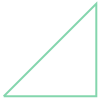

In [25]:
ring = geometry.LinearRing([(0, 0), (1, 1), (1, 0)])
ring

In [26]:
storefile = data_folder + r'pandas/store.hdf'

In [27]:
df['geometry'] = [ring] * len(df)

In [28]:
# on peut stocker des objets complexes qui ne pourraient pas être stockés en texte
df.to_hdf(storefile, 'geometry') 

C:\Users\qchasserieau\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->['message', 'geometry']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


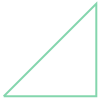

In [29]:
geo = pd.read_hdf(path_or_buf=storefile, key='geometry')
geo['geometry'].iloc[0]

### Reading Microsoft Excel Files <font color='#D22328'>[Advanced]</font>
C'est possible : voir pd.ExcelFile
Il est généralement plus simple de passer par l'étape CSV

## Interacting with Databases <font color='#D22328'>[Advanced]</font>

In [30]:
df = pd.read_csv(data_folder + r'pandas/data.csv') # lecture du CSV

In [31]:
con = sqlite3.connect(data_folder + r'pandas/database.db') # création de la base de données 

In [32]:
df.to_sql('mytable', con, if_exists='replace') # INSERT

In [33]:
pd.read_sql('SELECT * FROM mytable', con) # SELECT

,index,a,b,c,d,message
0,0,1,2,3,4,hello
1,1,5,6,7,8,world
2,2,9,10,11,12,foo
